In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import regex as re
from newspaper import Article 
import requests

import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
# df = pd.read_table("newsArticlesWithLabels.tsv")
# dataset from https://deepblue.lib.umich.edu/data/concern/data_sets/8w32r569d?locale=en

# df['article'] = df['url']

# def getArticle(url):
#     try:
#         article = Article(url)
#         article.download()
#         article.parse()
#         return(article.text)
#     except:
#         return("badurl")

# df['article'] = df.apply(lambda row: getArticle(row.url), axis = 1) 
# df.to_csv("articledata.csv", sep='\t')


In [6]:
data = pd.read_table("articledata.csv", sep='\t', index_col=0)
data.head()

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...


In [7]:
data = data[data.article != 'badurl']
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(16590, 8)

In [8]:
data

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark\n\nPew/Stateline Staff Writer\n\n...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...
...,...,...,...,...,...,...,...,...
16585,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...
16586,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ..."
16587,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...
16588,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...


In [9]:
data = data.drop(8)

In [10]:
# print(data.article.to_string())

In [11]:
badchars = ["\n", "/", "%.{2}", "\\"]

# for i in badchars:
#     data['article'] = data.apply(lambda row: row.replace(i, " "), axis = 1) 

for i in badchars:
    data['article'] = data['article'].str.replace(i, " ")

data.head()

/home/ash/miniconda3/envs/tf3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/home/ash/miniconda3/envs/tf3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ..."
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...


In [12]:
data['length'] = data['article'].str.split()
data['length'] = data['length'].str.len()
data = data.reset_index(drop=True)
data.head()

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article,length
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...,702
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...,1118
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...,1401
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ...",798
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...,947


In [13]:
# for i in range(1000):
#     print(data.loc[i].article)
#     print()

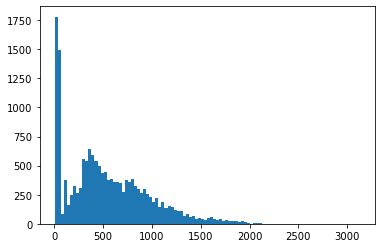

In [22]:
plt.hist(data.length, bins = 100)
plt.show()

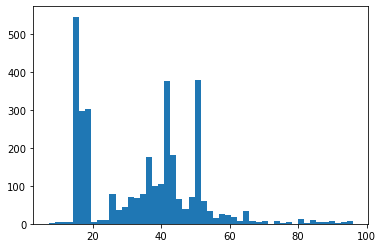

In [24]:
plt.hist(data[data['length']<100].length, bins = 50)
plt.show()

In [26]:
len(data['length'])

16589

In [27]:
len(data[data['length']<100])

3362

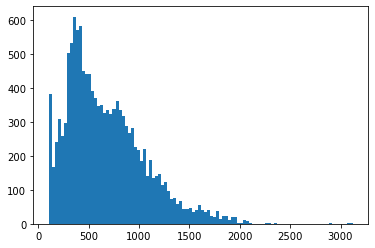

In [28]:
plt.hist(data[data['length']>100].length, bins = 100)
plt.show()

In [29]:
data = data[data['length']>100]

In [30]:
data.length.quantile([.25, .5, .75])

0.25    375.0
0.50    591.0
0.75    894.0
Name: length, dtype: float64

<AxesSubplot:>

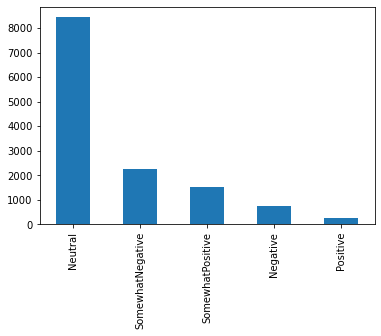

In [32]:
data['democrat.vote'].value_counts().plot.bar()

<AxesSubplot:>

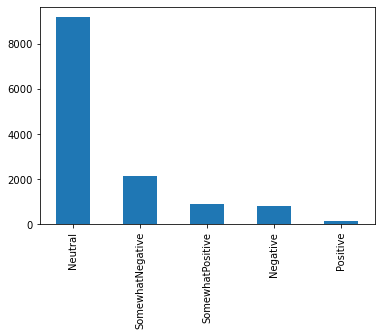

In [33]:
data['republican.vote'].value_counts().plot.bar()

<AxesSubplot:xlabel='democrat.vote,republican.vote'>

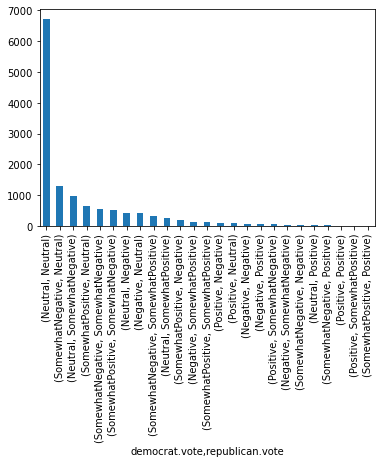

In [34]:
data[['democrat.vote', 'republican.vote']].value_counts().plot.bar()

In [35]:
def numerizeBias(label):
    if label=="SomewhatNegative":
        return -0.5
    if label == "SomewhatPositive":
        return 0.5
    if label == "Negative":
        return -1
    if label == "Positive":
        return 1
    return 0

In [36]:
data["democrat.bias"]= data.apply(lambda row: numerizeBias(row["democrat.vote"]), axis = 1) 
data["republican.bias"]= data.apply(lambda row: numerizeBias(row["republican.vote"]), axis = 1) 

# data["biasmagnitude.democrat"]=data.apply(lambda row: row["democrat.bias"] + abs(row["republican.bias"]), axis = 1)
# data["biasmagnitude.republican"]=data.apply(lambda row: abs(row["democrat.bias"] + abs(row["republican.bias"]), axis = 1)

data["isbiased"] = data.apply(lambda row: 0 if row["democrat.bias"]==0 and row["republican.bias"]==0 else 1, axis = 1)
data

/home/ash/miniconda3/envs/tf3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ash/miniconda3/envs/tf3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ash/miniconda3/envs/tf3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,url,q3,perceived,primary.topic,secondary.topic,democrat.vote,republican.vote,article,length,democrat.bias,republican.bias,isbiased
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral,Maggie Clark Pew Stateline Staff Writer 21 s...,702,0.0,0.0,0
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral,WASHINGTON -- The Senate Judiciary Committee a...,1118,0.0,0.0,0
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,David Cole is a professor of constitutional la...,1401,0.0,0.0,0
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,"Parts of ObamaCare are starting to fray, even ...",798,0.0,0.0,0
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral,U.S. Immigration Citizenship and Immigration S...,947,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16584,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,President Obama won reelection in part by beat...,768,0.5,-0.5,1
16585,http://news.yahoo.com/republicans-hatred-obama...,Opinion,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,"Red-faced Republicans, circling and preparing ...",805,0.5,-0.5,1
16586,http://www.washingtonpost.com/opinions/dana-mi...,News,1,Republican Scandals,Republican Scandals,Neutral,Neutral,Rep. Steve Stockman’s moment as a viable Senat...,896,0.0,0.0,0
16587,http://www.washingtonpost.com/opinions/ej-dion...,News,1,Republican Scandals,Republican Scandals,SomewhatPositive,SomewhatNegative,We interrupt this highly partisan and ideologi...,751,0.5,-0.5,1


<AxesSubplot:>

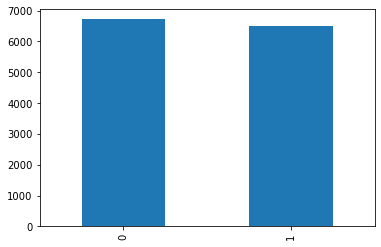

In [37]:
data["isbiased"].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

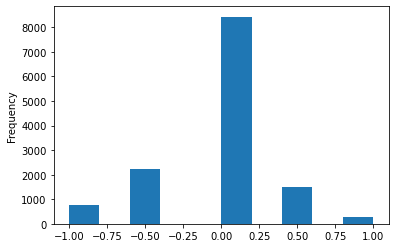

In [38]:
data["democrat.bias"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

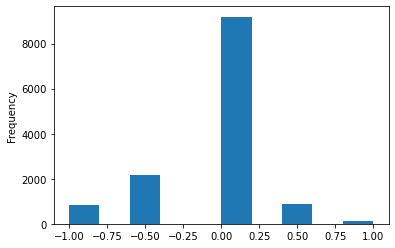

In [39]:
data["republican.bias"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

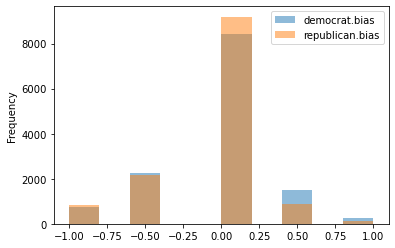

In [42]:
data[["democrat.bias", "republican.bias"]].plot.hist(alpha=0.5)

In [43]:
data["biascategories"] =  data.apply(lambda row: 0 if row["democrat.bias"]==row["republican.bias"] else (1 if row["democrat.bias"]>row["republican.bias"] else -1), axis = 1)
# 1 means bias towards democrats over republicans
# -1 means bias towards republicans over democrats
# 0 equal bias

/home/ash/miniconda3/envs/tf3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Frequency'>

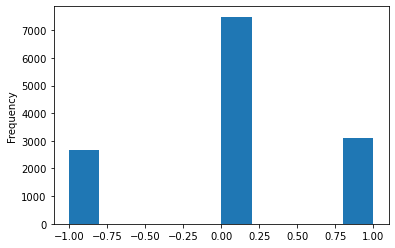

In [44]:
data["biascategories"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

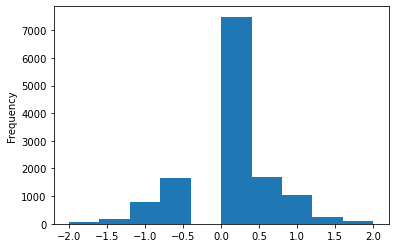

In [45]:
data["biasmagnitude"] =  data.apply(lambda row: 0 if row["democrat.bias"]==row["republican.bias"] else row["democrat.bias"]-row["republican.bias"], axis = 1)
data["biasmagnitude"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

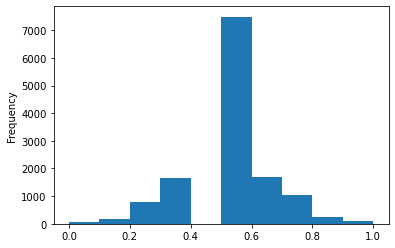

In [47]:
data["biasprob"] =  (data["biasmagnitude"]+2)/4
data["biasprob"].plot.hist()

In [50]:
data.head()
print(data.shape)

(13227, 15)


In [49]:
saved_data = data[["article", 
                   "democrat.bias", 
                   "republican.bias", 
                   "isbiased", 
                   "biascategories",
                   "biasprob"]]
print(saved_data.shape)

(13227, 6)


In [51]:
data.to_csv("biaseddata.csv", sep='\t')


In [26]:
# data["biasedforeveryone"] =  data.apply(lambda row: -99 if row["democrat.bias"]>=0 and row["republican.bias"]>=0 else 0, axis = 1)
# # high value of biasdiff means high bias towards democrats and against republicans
# # low (negative) value of biasdiff means high bias towards republicans and democrats
# data["biasedforeveryone"].plot.hist()

In [27]:
data.to_csv("biaseddata.csv", sep='\t')


In [27]:
data[data['democrat.vote']==data['republican.vote']].shape

(9793, 9)

In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q t5

In [77]:
from transformers import pipeline
from transformers import T5Tokenizer, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

ImportError: 
T5ForConditionalGeneration requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.


In [ ]:
stri = data.article[0]

In [ ]:
stri

In [ ]:
stri = re.sub(r"\\.", " ", stri)
stri

In [ ]:
print("\\\d")

In [15]:
data.head()

NameError: name 'data' is not defined

In [26]:
import transformers
from transformers import T5Model, T5Tokenizer
from transformers import ElectraModel, ElectraConfig
from transformers import pipeline

In [ ]:
!mkdir data
!ls -la

In [ ]:
data_dir = "./data"
log_dir = f"{data_dir}/experiments/t5/logs"
save_path = f"{data_dir}/experiments/t5/models"
cache_path_train = f"{data_dir}/cache/t5.train"
cache_path_test = f"{data_dir}/cache/t5.test"

In [27]:
import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from transformers import (TFAutoModelWithLMHead, AutoTokenizer, 
    TFTrainer, TFTrainingArguments, TFT5ForConditionalGeneration, T5Config)
import datetime
import os
import ipywidgets
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
class SnapthatT5(TFT5ForConditionalGeneration):
    def __init__(self, *args, log_dir=None, cache_dir= None, **kwargs):
        super().__init__(*args, **kwargs)
        self.loss_tracker= tf.keras.metrics.Mean(name='loss') 
    
    @tf.function
    def train_step(self, data):
        x, _= data
        y = x["labels"]
        y = tf.reshape(y, [-1, 1])
        with tf.GradientTape() as tape:
            outputs = self(x, training=True)
            loss = outputs[0]
            logits = outputs[1]
            loss = tf.reduce_mean(loss)
            
            grads = tape.gradient(loss, self.trainable_variables)
            
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        lr = self.optimizer._decayed_lr(tf.float32)
        
        self.loss_tracker.update_state(loss)        
        self.compiled_metrics.update_state(y, logits)
        metrics = {m.name: m.result() for m in self.metrics}
        metrics.update({'lr': lr})
        
        return metrics

    def test_step(self, data):
        x, _ = data
        y = x["labels"]
        y = tf.reshape(y, [-1, 1])
        output = self(x, training=False)
        loss = output[0]
        loss = tf.reduce_mean(loss)
        logits = output[1]
        
        self.loss_tracker.update_state(loss)
        self.compiled_metrics.update_state(y, logits)
        return {m.name: m.result() for m in self.metrics}

In [29]:
tokenizer = AutoTokenizer.from_pretrained("t5-base", use_fast = False)

In [30]:


train_dataset, info = tfds.load('squad', split='train', with_info=True)
valid_dataset = tfds.load('squad', split='validation', with_info=False)
print(info)



INFO:absl:No config specified, defaulting to first: squad/v1.1
INFO:absl:Load dataset info from /home/ash/tensorflow_datasets/squad/v1.1/2.0.0
INFO:absl:Reusing dataset squad (/home/ash/tensorflow_datasets/squad/v1.1/2.0.0)
INFO:absl:Constructing tf.data.Dataset for split train, from /home/ash/tensorflow_datasets/squad/v1.1/2.0.0
INFO:absl:No config specified, defaulting to first: squad/v1.1
INFO:absl:Load dataset info from /home/ash/tensorflow_datasets/squad/v1.1/2.0.0
INFO:absl:Reusing dataset squad (/home/ash/tensorflow_datasets/squad/v1.1/2.0.0)
INFO:absl:Constructing tf.data.Dataset for split validation, from /home/ash/tensorflow_datasets/squad/v1.1/2.0.0


tfds.core.DatasetInfo(
    name='squad',
    full_name='squad/v1.1/2.0.0',
    description="""
    Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset, consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage, or the question might be unanswerable.
    """,
    config_description="""
    Version 1.1.0 of SQUAD
    """,
    homepage='https://rajpurkar.github.io/SQuAD-explorer/',
    data_path='/home/ash/tensorflow_datasets/squad/v1.1/2.0.0',
    download_size=33.51 MiB,
    dataset_size=94.04 MiB,
    features=FeaturesDict({
        'answers': Sequence({
            'answer_start': tf.int32,
            'text': Text(shape=(), dtype=tf.string),
        }),
        'context': Text(shape=(), dtype=tf.string),
        'id': tf.string,
        'question': Text(shape=(), dtype=tf.string),
        'title': Text(shape=(), dtype=tf.string),
    

In [31]:


data = next(iter(train_dataset))
print("Example data from the dataset: \n", data)



Example data from the dataset: 
 {'answers': {'answer_start': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([427], dtype=int32)>, 'text': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'mobile phones'], dtype=object)>}, 'context': <tf.Tensor: shape=(), dtype=string, numpy=b'The difference in the above factors for the case of \xce\xb8=0 is the reason that most broadcasting (transmissions intended for the public) uses vertical polarization. For receivers near the ground, horizontally polarized transmissions suffer cancellation. For best reception the receiving antennas for these signals are likewise vertically polarized. In some applications where the receiving antenna must work in any position, as in mobile phones, the base station antennas use mixed polarization, such as linear polarization at an angle (with both vertical and horizontal components) or circular polarization.'>, 'id': <tf.Tensor: shape=(), dtype=string, numpy=b'57306bf68ab72b1400f9c4dc'>, 'question': <tf.Tensor: 

In [32]:
warmup_steps = 1e4
batch_size = 4
encoder_max_len = 250
decoder_max_len = 54
buffer_size = 1000
ntrain = info.splits["train"].num_examples
nvalid = info.splits["validation"].num_examples
steps = int(np.ceil(ntrain/batch_size))
valid_steps = int(np.ceil(nvalid/batch_size))
print("Total Steps: ", steps)
print("Total Validation Steps: ", valid_steps)

Total Steps:  21900
Total Validation Steps:  2643


In [33]:
def encode(context,question ,answer, 
           encoder_max_len=encoder_max_len, decoder_max_len=decoder_max_len):
    question_plus = f"answer_me: {str(question.numpy().decode('utf-8'))}"
    question_plus += f" context: {str(context.numpy().decode('utf-8'))}  </s>"
    
    answer_plus = ', '.join([i.decode('utf-8') for i in list(answer.numpy())])
    answer_plus = f"{answer_plus} </s>"
    
    encoder_inputs = tokenizer(question_plus, truncation=True, 
                               return_tensors='tf', max_length=encoder_max_len,
                              pad_to_max_length=True)
    
    decoder_inputs = tokenizer(answer_plus, truncation=True, 
                               return_tensors='tf', max_length=decoder_max_len,
                              pad_to_max_length=True)
    
    input_ids = encoder_inputs['input_ids'][0]
    input_attention = encoder_inputs['attention_mask'][0]
    target_ids = decoder_inputs['input_ids'][0]
    target_attention = decoder_inputs['attention_mask'][0]
    
    return input_ids,input_attention, target_ids, target_attention

In [34]:
def encode_tf(inputs):
    context = inputs['context']
    question = inputs['question']
    answer = inputs['answers']['text']
    encoded = tf.py_function(encode, [context, question, answer], 
                                           [tf.int32, tf.int32, tf.int32, tf.int32])
    input_ids,input_attention, target_ids,target_attention = encoded
    input_ids.set_shape([None])
    target_ids.set_shape([None])
    input_attention.set_shape([None])
    target_attention.set_shape([None])
    
#     labels = tf.reshape(target_ids, [-1, 1])
    data=  {'input_ids': input_ids, #'decoder_input_ids': target_ids, 
            'labels': target_ids, 
            'attention_mask': input_attention,
           'decoder_attention_mask': target_attention}
    return (data, None)

In [35]:
def create_dataset(source_dataset, cache_path=None, batch_size=4, 
                   buffer_size= 1000, shuffling=True):
    dataset = source_dataset.map(encode_tf, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    if cache_path is not None:
        dataset = dataset.cache(cache_path)        
    if shuffling:
        dataset = dataset.shuffle(buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset


In [36]:


train_ds= create_dataset(train_dataset, batch_size=batch_size, 
                         shuffling=True, cache_path = None)
valid_ds = create_dataset(valid_dataset, batch_size=batch_size, 
                         shuffling=False, cache_path = None)



In [37]:


data = next(iter(train_ds))
data



UnknownError: RuntimeError: Already borrowed
Traceback (most recent call last):

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 242, in __call__
    return func(device, token, args)

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 131, in __call__
    ret = self._func(*args)

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "<ipython-input-33-cec5a4c25e08>", line 11, in encode
    pad_to_max_length=True)

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/transformers/tokenization_utils_base.py", line 2356, in __call__
    **kwargs,

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/transformers/tokenization_utils_base.py", line 2426, in encode_plus
    **kwargs,

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/transformers/tokenization_utils_fast.py", line 465, in _encode_plus
    **kwargs,

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/transformers/tokenization_utils_fast.py", line 372, in _batch_encode_plus
    pad_to_multiple_of=pad_to_multiple_of,

  File "/home/ash/miniconda3/envs/tf/lib/python3.7/site-packages/transformers/tokenization_utils_fast.py", line 323, in set_truncation_and_padding
    self._tokenizer.enable_truncation(max_length, stride=stride, strategy=truncation_strategy.value)

RuntimeError: Already borrowed


	 [[{{node EagerPyFunc}}]]